In [1]:
import pandas as pd
import json
import os

In [2]:
# Find all json files in the results folder
results_folder = 'results'
results_files = [f for f in os.listdir(results_folder) if f.endswith('.json')]

# Read results from json files in the results folder into a pandas dataframe
results = pd.DataFrame()
for results_file in results_files:
    with open(os.path.join(results_folder, results_file)) as f:
        data = json.load(f)
        print(data)
        results = pd.concat([results, pd.DataFrame(data)], axis=1)


{'global_l1_pruning': {'accuracy': 0.7659638524055481, 'f1_score': 0.7656566500663757, 'average_inference_time': 0.13633317257984576}}
{'float32': {'accuracy': 0.7657630443572998, 'f1_score': 0.7653846740722656, 'average_inference_time': 0.11787169956299196}, 'quantized': {'accuracy': 0.7633534073829651, 'f1_score': 0.763630211353302, 'average_inference_time': 0.030699547514858015}}
{'type_aware_pruning': {'accuracy': 0.6147590279579163, 'f1_score': 0.550220787525177, 'average_inference_time': 0.1402273565889841}}
{'global_random_pruning': {'accuracy': 0.27339357137680054, 'f1_score': 0.2344137281179428, 'average_inference_time': 0.1274674685604601}}


In [3]:
results

,global_l1_pruning,float32,quantized,type_aware_pruning,global_random_pruning
accuracy,0.765964,0.765763,0.763353,0.614759,0.273394
f1_score,0.765657,0.765385,0.763630,0.550221,0.234414
average_inference_time,0.136333,0.117872,0.030700,0.140227,0.127467


<Axes: title={'center': 'F1 Score'}>

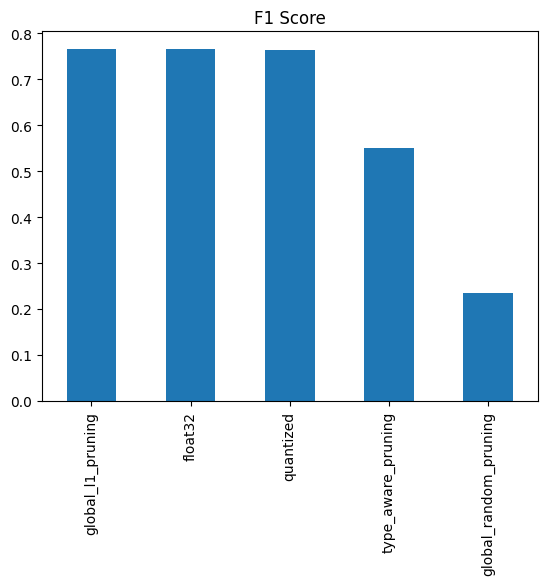

In [4]:
results.loc["f1_score"].plot(kind='bar', title='F1 Score')

<Axes: title={'center': 'Average Inference Time'}>

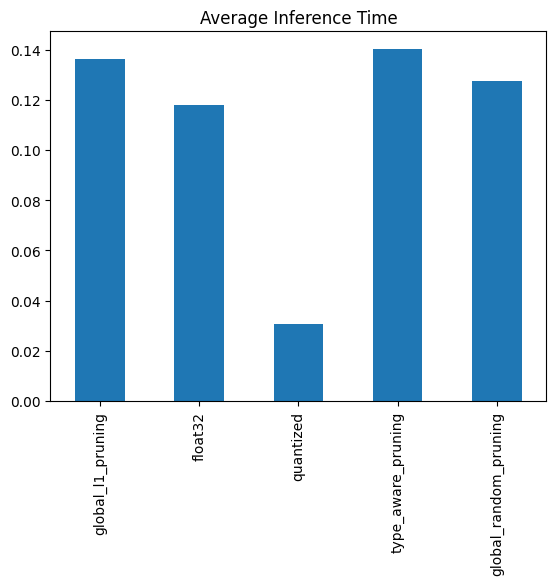

In [5]:
results.loc["average_inference_time"].plot(kind='bar', title='Average Inference Time')